# Border Duration and Layer Change Analysis

## Notebook Summary
- Loads tracking and results data generated by the study processing pipeline.
- Derives a layer transition signal (`LayerChange`) from consecutive layer values.
- Aggregates layer-change counts per participant/trial and merges them with trial metadata.
- Exports analysis tables and creates descriptive statistics/plots by layer and expected result layer.


## Setup Shared Utilities
Load shared imports, helper functions, and export path variables from `functions.ipynb`.


In [1]:
# Load shared imports, helper functions, and export path variables.
%run functions.ipynb


## Load and Prepare Input Data
Read tracking and results tables, then compute the row-wise `LayerChange` value from consecutive layer assignments.


In [2]:
# Load full tracking data with one row per sampled interaction step.
data_complete = pd.read_csv(rf'{export_data}data_all.csv', sep=";")

# Convert layer labels to numeric values and compute step-to-step layer transitions.
data_complete['LayerChange'] = data_complete['Layer'].replace('-', np.NaN).astype(float).diff()

display(data_complete)

# Load trial-level results metadata used for merges and exports.
results_complete = pd.read_csv(rf'{export_data}results_all.csv', sep=";")


,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker,LayerChange
0,2022-08-01 13:58:38.416,2,-4,0,-8,Combined Feedback,176,3,3,0,...,153,147,135,114,P02_2022-08-01,NaN,NaN,NaN,START_BLOCK | START_TRAINING,NaN
1,2022-08-01 13:58:38.448,2,-4,0,-8,Combined Feedback,176,3,3,0,...,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-,NaN
2,2022-08-01 13:58:38.477,2,-4,0,-8,Combined Feedback,176,3,3,0,...,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-,NaN
3,2022-08-01 13:58:38.508,2,-4,0,-8,Combined Feedback,176,3,3,0,...,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-,NaN
4,2022-08-01 13:58:38.541,2,-4,0,-8,Combined Feedback,176,3,3,0,...,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371627,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-,NaN
3371628,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-,NaN
3371629,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-,NaN
3371630,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-,NaN


## Aggregate Layer Changes per Trial
Count non-zero layer transitions per participant/trial, merge with trial-level results, export datasets, and compute summary statistics.


LayerChange
ProbandId TrialNumber             
2         -8                    77
          -7                    26
          -6                    34
          -5                    26
          -4                   137
...                            ...
23         79                   21
           80                   18
           81                   26
           82                   27
           83                   13

[2024 rows x 1 columns]

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,CleanedUpInteractionStart_DT,CleanedUpInteractionEnd_DT,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition,LayerChange
0,-4,2022-08-01T14:01:37.953Z,Combined Feedback,2022-08-01T14:01:30.874Z,3,176,"[131, 144, 176, 153, 147, 135, 114]",2,2,153,...,2022-08-01 13:59:15.117,2022-08-01 14:01:30.874,-23,-1,False,False,135.757,135.757,0,60
1,-4,2022-08-01T14:02:26.995Z,Combined Feedback,2022-08-01T14:02:22.682Z,7,158,"[149, 118, 145, 137, 147, 146, 158]",2,4,147,...,2022-08-01 14:01:37.954,2022-08-01 14:02:22.682,-11,-3,False,False,44.728,44.728,1,60
2,-3,2022-08-01T14:03:44.338Z,Visual Feedback,2022-08-01T14:03:39.613Z,2,161,"[150, 161, 134, 151, 128, 149, 127]",2,2,161,...,2022-08-01 14:02:33.306,2022-08-01 14:03:39.613,0,0,True,True,66.307,66.307,0,60
3,-3,2022-08-01T14:04:34.107Z,Visual Feedback,2022-08-01T14:04:29.378Z,4,150,"[132, 144, 148, 150, 149, 147, 130]",2,4,150,...,2022-08-01 14:03:44.339,2022-08-01 14:04:29.378,0,0,True,True,45.039,45.039,1,60
4,-2,2022-08-01T14:07:33.355Z,Tactile Feedback,2022-08-01T14:07:23.779Z,6,160,"[139, 144, 128, 136, 156, 160, 137]",2,3,160,...,2022-08-01 14:05:08.405,2022-08-01 14:07:23.779,0,-3,False,True,135.374,135.374,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,2022-08-23 11:26:33.878,2022-08-23 11:27:08.564,0,0,True,True,37.272,34.686,501,21
2020,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,2022-08-23 11:27:15.467,2022-08-23 11:27:44.655,0,0,True,True,31.479,29.188,502,18
2021,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,2022-08-23 11:27:50.891,2022-08-23 11:28:45.618,0,0,True,True,56.632,54.727,503,26
2022,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,2022-08-23 11:28:54.105,2022-08-23 11:29:28.940,0,0,True,True,37.968,34.835,504,27


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
countCondition,,,,
2,60,14,18,13
3,19,12,14,20
4,43,13,12,20
5,40,17,18,15
6,32,34,11,13
...,...,...,...,...
501,21,29,14,19
502,18,16,13,10
503,26,13,14,13


BlockId,0,1,2,3
Condition,,,,
No Feedback,25.849206,19.071429,20.752381,19.809524
Tactile Feedback,24.732143,20.761905,19.309524,18.892857
Visual Feedback,16.542857,16.119048,15.272109,14.988095
Combined Feedback,15.793651,16.738095,15.148810,17.108844


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,462.000000,462.000000,462.000000,462.000000
mean,21.536797,21.733766,15.740260,16.149351
std,10.457732,10.318597,4.546418,5.305973
min,3.000000,8.000000,9.000000,9.000000
25%,14.000000,14.000000,13.000000,13.000000
50%,18.000000,18.500000,14.000000,14.000000
75%,26.000000,26.000000,18.000000,18.000000
max,89.000000,74.000000,35.000000,52.000000


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
TrialId,,,,
0,18.590909,21.454545,16.545455,16.227273
1,19.045455,21.772727,15.545455,17.590909
2,22.409091,20.181818,15.500000,15.454545
3,20.727273,23.227273,16.545455,15.590909
4,22.727273,25.409091,15.454545,18.181818
5,20.909091,22.454545,16.227273,15.772727
6,17.681818,21.590909,15.954545,17.181818
7,19.909091,22.000000,15.681818,16.318182
8,20.454545,21.590909,15.318182,15.409091


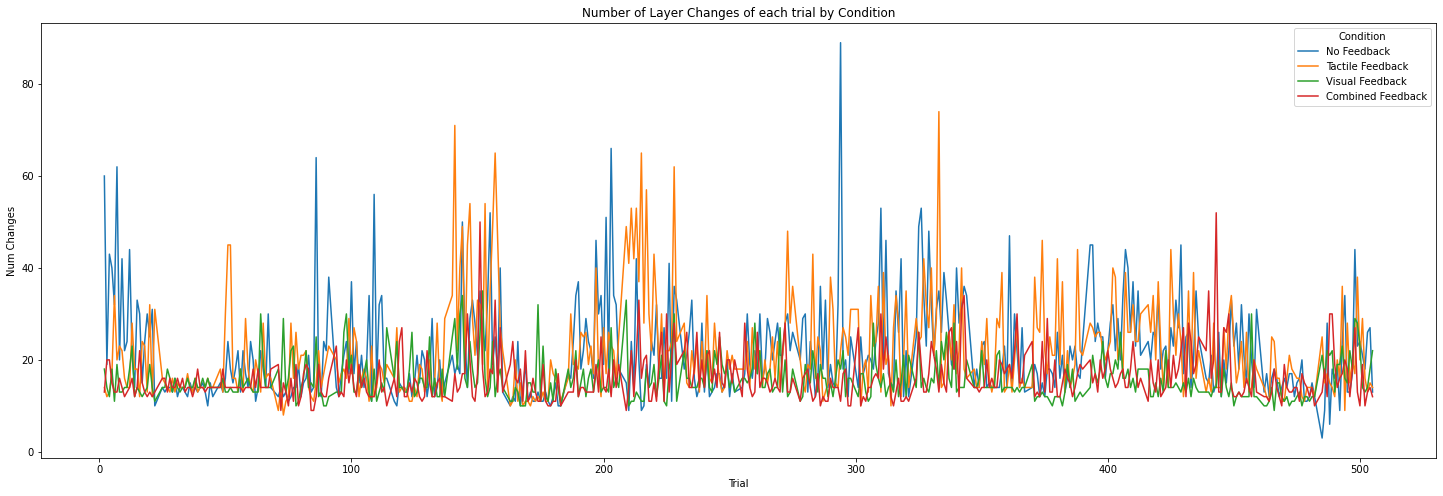

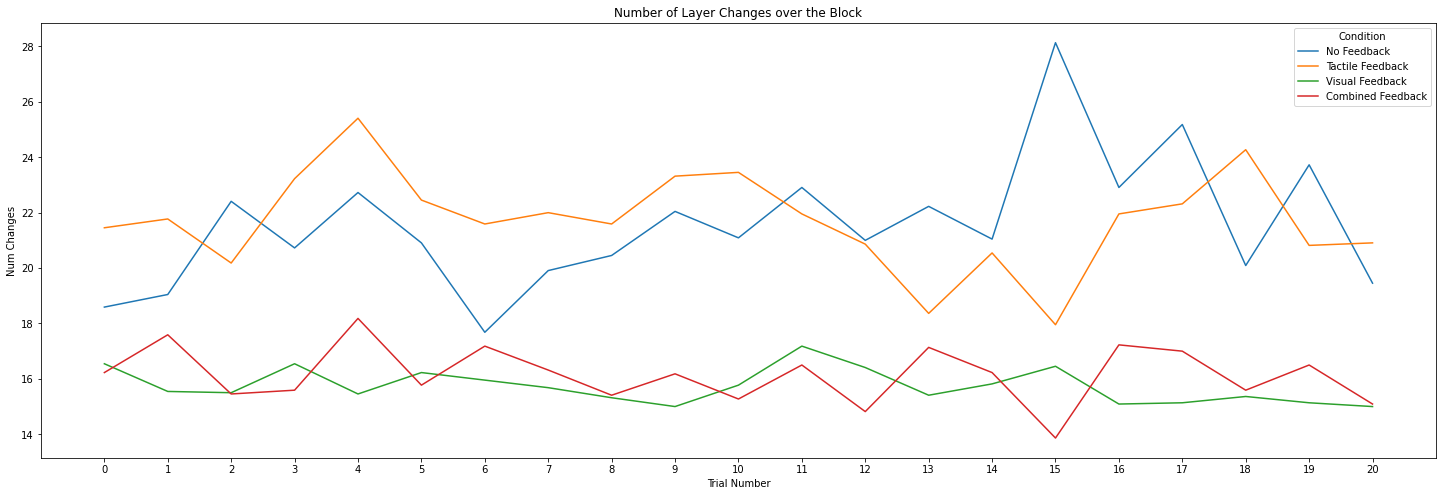

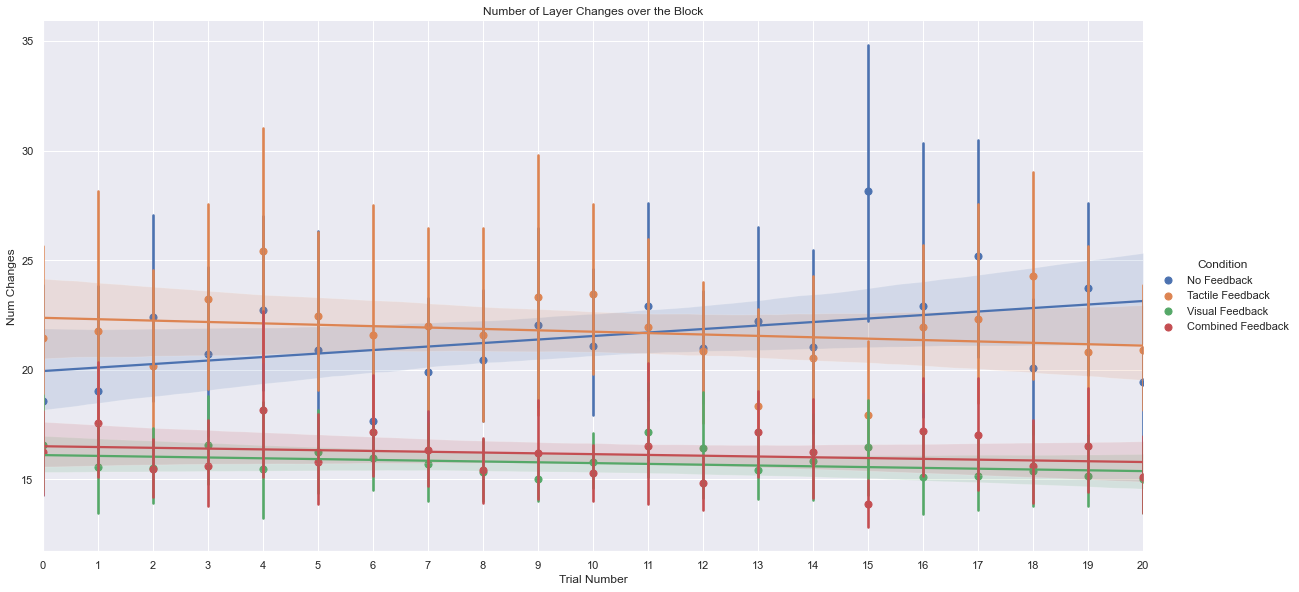

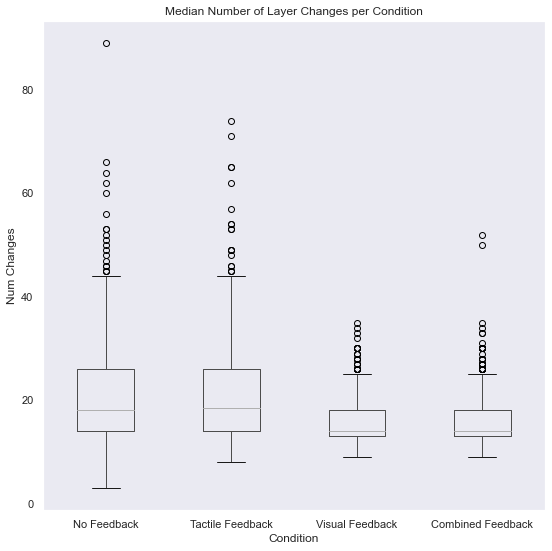

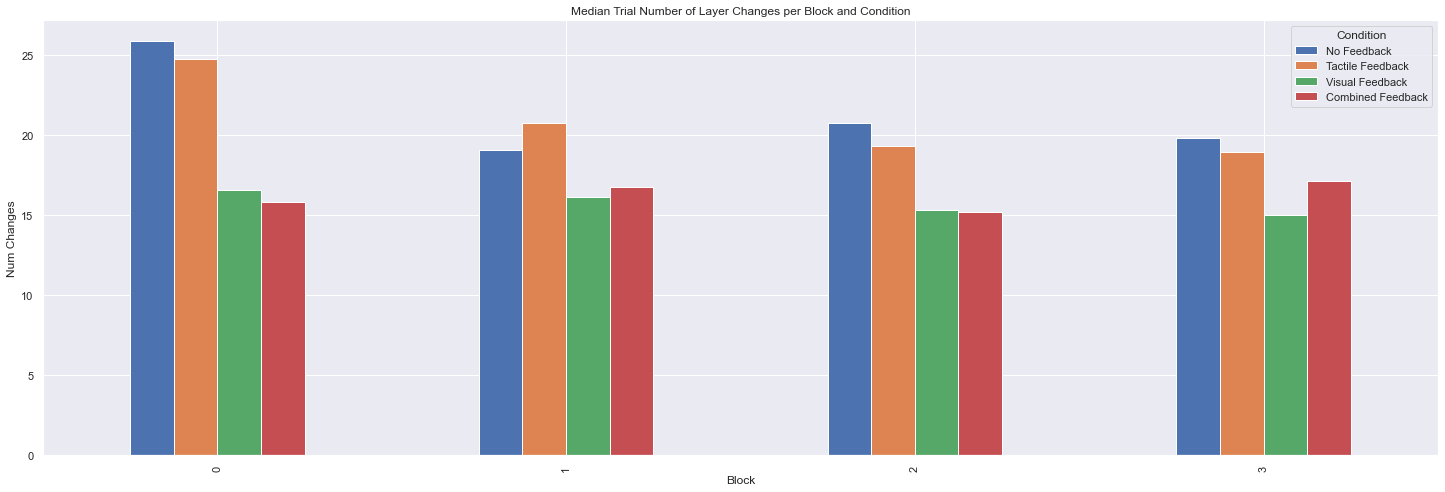

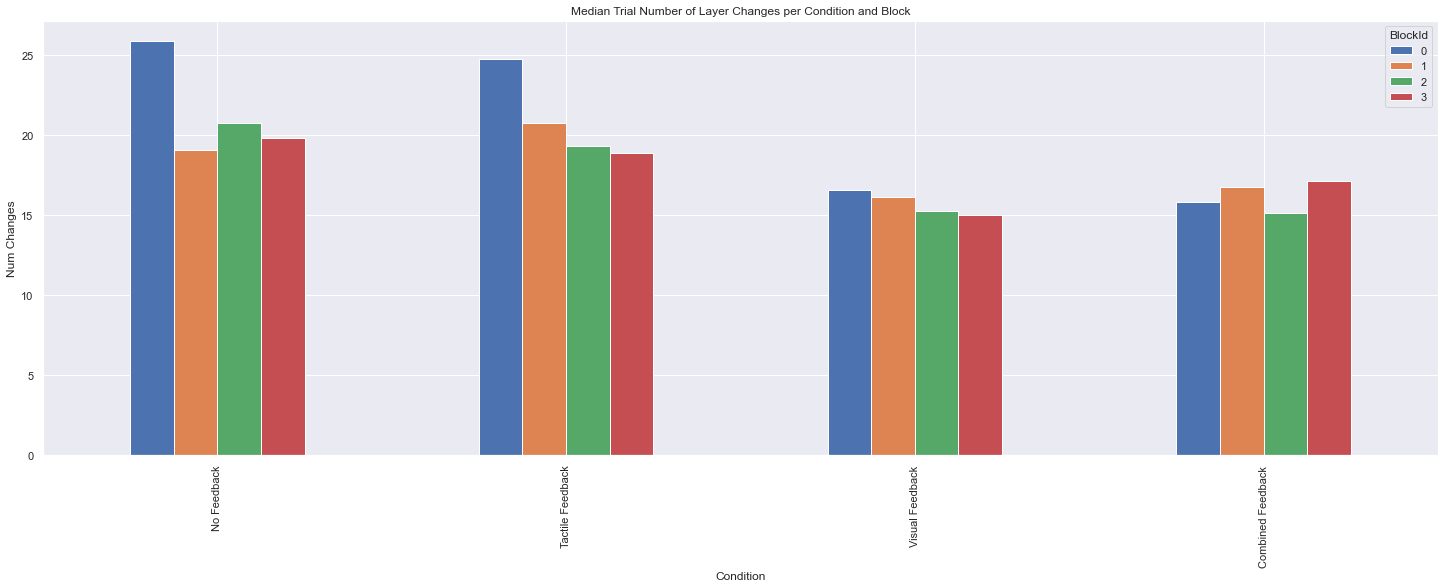

In [3]:
# Keep rows with recorded layer transitions and group by participant and trial.
grouped_p_tNr = data_complete[(data_complete['LayerChange'] != 0) & (data_complete['LayerChange'] != np.NaN)].groupby(['ProbandId', 'TrialNumber'])

# Count transition events (`LayerChange`) per participant/trial group.
count_layerChanged = grouped_p_tNr.count()['LayerChange']

display(pd.DataFrame(count_layerChanged))

# Convert grouped counts into a flat table for joining with trial results.
df_layerChange = pd.DataFrame(count_layerChanged).reset_index()

# Merge layer-change counts into the complete trial-level results dataset.
merged = pd.merge(results_complete, df_layerChange, on=['ProbandId', 'TrialNumber'], how='left')

display(merged)

# Exclude training blocks and keep only experiment trials for statistics.
merged_experiment = merged[merged['BlockId'] >= 0]

# Export both full and experiment-only datasets for downstream analysis.
merged.to_csv(rf'{export_data}layerChanges_pID_tNr.csv', sep=";")
merged_experiment.to_csv(rf'{export_data}layerChanges_experiment_pID_tNr.csv', sep=";")

# Compute and export descriptive statistics/plots for experiment trials.
computeStatistics(merged_experiment, 'LayerChange', 'layerChange', 'Number of Layer Changes', 'Num Changes')


## Analyze Layer Changes by Layer
Count transitions per visited layer, compute descriptive summaries, and generate boxplots by displayed layer and expected result layer.


,ProbandId,TrialNumber,Layer,LayerChange
0,2,-8,0,7
1,2,-8,1,12
2,2,-8,2,13
3,2,-8,3,14
4,2,-8,4,12
...,...,...,...,...
16151,23,83,3,1
16152,23,83,4,2
16153,23,83,5,1
16154,23,83,6,3


,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,CleanedUpInteractionEnd_DT,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition,Layer,LayerChange
64,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2,0,6
65,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2,1,17
66,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2,2,14
67,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2,3,9
68,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16147,3,2022-08-23T11:30:05.548Z,No Feedback,2022-08-23T11:30:01.812Z,7,169,"[149, 122, 137, 130, 150, 143, 169]",23,7,169,...,2022-08-23 11:30:00.879,0,0,True,True,28.904,26.450,505,3,1
16148,3,2022-08-23T11:30:05.548Z,No Feedback,2022-08-23T11:30:01.812Z,7,169,"[149, 122, 137, 130, 150, 143, 169]",23,7,169,...,2022-08-23 11:30:00.879,0,0,True,True,28.904,26.450,505,4,2
16149,3,2022-08-23T11:30:05.548Z,No Feedback,2022-08-23T11:30:01.812Z,7,169,"[149, 122, 137, 130, 150, 143, 169]",23,7,169,...,2022-08-23 11:30:00.879,0,0,True,True,28.904,26.450,505,5,1
16150,3,2022-08-23T11:30:05.548Z,No Feedback,2022-08-23T11:30:01.812Z,7,169,"[149, 122, 137, 130, 150, 143, 169]",23,7,169,...,2022-08-23 11:30:00.879,0,0,True,True,28.904,26.450,505,6,3


Layer,0,1,2,3,4,5,6,7
count,1848.000000,1848.000000,1848.000000,1847.000000,1846.000000,1843.000000,1840.000000,1832.000000
mean,1.420996,3.360390,3.153139,2.616134,2.398700,2.342919,2.347826,1.180677
std,1.268601,2.427507,2.109568,1.475851,1.215206,1.133172,1.045301,0.529416
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,10.000000,27.000000,24.000000,16.000000,12.000000,14.000000,14.000000,7.000000


Layer,0,1,2,3,4,5,6,7
count,1848.000000,1848.000000,1848.000000,1847.000000,1846.000000,1843.000000,1840.000000,1832.000000
mean,1.420996,3.360390,3.153139,2.616134,2.398700,2.342919,2.347826,1.180677
std,1.268601,2.427507,2.109568,1.475851,1.215206,1.133172,1.045301,0.529416
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,10.000000,27.000000,24.000000,16.000000,12.000000,14.000000,14.000000,7.000000


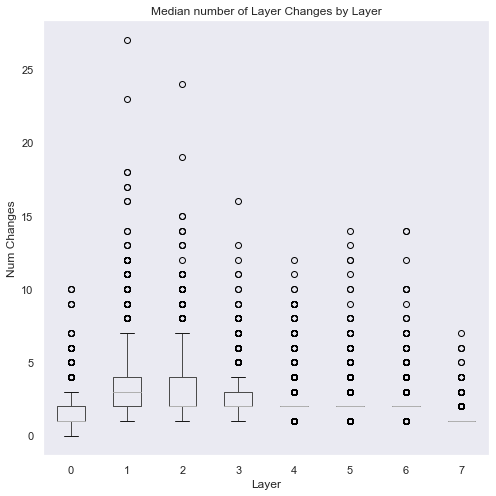

ExpectedResultLayer,1,2,3,4,5,6,7
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2.341802,2.343669,2.425415,2.448390,2.304857,2.353017,2.260890
std,1.067921,0.849008,1.036975,1.176903,1.043053,1.186706,1.159382
min,1.250000,1.000000,1.125000,1.125000,1.000000,1.125000,1.250000
25%,1.750000,1.750000,1.750000,1.750000,1.625000,1.625000,1.625000
50%,2.000000,2.250000,2.125000,2.000000,1.875000,1.875000,1.750000
75%,2.625000,2.750000,2.781250,2.875000,2.750000,2.656250,2.500000
max,9.250000,6.750000,8.125000,11.125000,7.500000,7.750000,8.875000


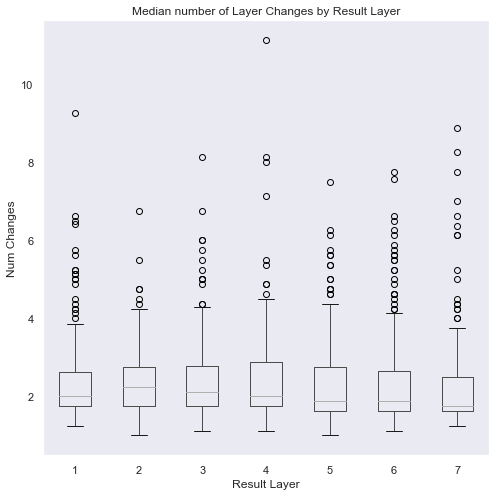

In [4]:
# Keep valid rows with a concrete layer value and a recorded layer transition.
grouped_p_tNr_l = data_complete[(data_complete['Layer'] != '-') & (data_complete['LayerChange'] != 0) & (data_complete['LayerChange'] != np.NaN)].groupby(['ProbandId', 'TrialNumber', 'Layer'])

# Count transition events per participant/trial/layer group.
count_layerChanged_per_layer = grouped_p_tNr_l.count()['LayerChange']

# Flatten grouped counts before joining with trial-level metadata.
df_layerChange_layer = pd.DataFrame(count_layerChanged_per_layer).reset_index()

display(df_layerChange_layer)

# Merge per-layer change counts and keep experiment blocks only.
merged_layer = pd.merge(results_complete, df_layerChange_layer, on=['ProbandId', 'TrialNumber'], how='left')

merged_layer = merged_layer[merged_layer['BlockId'] >= 0]

display(merged_layer)

# Summarize layer-change distributions by displayed layer.
conditions_layer = merged_layer.groupby(['Layer'])

display(conditions_layer.describe()['LayerChange'].transpose())

# Pivot to one column per displayed layer for per-trial distribution comparisons.
desc_pivot = merged_layer.pivot_table(columns=['Layer'], index = ['ProbandId', 'TrialNumber'])['LayerChange']

display(desc_pivot.describe())

# Plot and export layer-change distributions by displayed layer.
fig1, ax1 = plt.subplots(figsize=(8,8))

desc_pivot.boxplot(ax = ax1)

ax1.set_xlabel('Layer')
ax1.set_ylabel('Num Changes')
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)

plt.title(f'Median number of Layer Changes by Layer')
    
fig1.savefig(rf'{export_img}layerChange_Layers-box.png')
fig1.savefig(rf'{export_img}layerChange_Layers-box.svg')
    
plt.show()

# Pivot to one column per expected result layer.
desc_pivot_result = merged_layer.pivot_table(columns=['ExpectedResultLayer'], index = ['ProbandId', 'TrialNumber'])['LayerChange']

display(desc_pivot_result.describe())

# Plot and export layer-change distributions by expected result layer.
fig2, ax2 = plt.subplots(figsize=(8,8))

desc_pivot_result.boxplot(ax = ax2)

ax2.set_xlabel('Result Layer')
ax2.set_ylabel('Num Changes')
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

plt.title(f'Median number of Layer Changes by Result Layer')
    
fig1.savefig(rf'{export_img}layerChange_ResultLayer-box.png')
fig1.savefig(rf'{export_img}layerChange_ResultLayer-box.svg')
    
plt.show()
